# Create a linear model

In this basic example we are going to create a global approximation of a model response using linear model approximation.

Here

$$h(x,y) = [2 x + 0.05 * \sin(x) - y]$$

In [1]:
from __future__ import print_function
import openturns as ot
try:
    get_ipython()
except NameError:
    import matplotlib
    matplotlib.use('Agg')
from openturns.viewer import View
import numpy as np
import matplotlib.pyplot as plt

Hereafter we generate data using the previous model. We also add a noise: 

In [2]:
ot.RandomGenerator.SetSeed(0)
distribution = ot.Normal(2)
distribution.setDescription(["x","y"])
func = ot.SymbolicFunction(['x', 'y'], ['2 * x - y + 3 + 0.05 * sin(0.8*x)'])
input_sample = distribution.getSample(30)
epsilon = ot.Normal(0, 0.1).getSample(30)
output_sample = func(input_sample) + epsilon

Let us run the linear model algorithm using the `LinearModelAlgorithm` class & get its associated result :

In [3]:
algo = ot.LinearModelAlgorithm(input_sample, output_sample)
result = ot.LinearModelResult(algo.getResult())

We get the result structure. As the underlying model is of type regression, it assumes a noise distribution associated to the residuals. Let us get it:

In [4]:
print(result.getNoiseDistribution())

Normal(mu = 0, sigma = 0.110481)


We can get also residuals:

In [5]:
print(result.getSampleResiduals())

     [ y0          ]
 0 : [  0.186748   ]
 1 : [ -0.117266   ]
 2 : [ -0.039708   ]
 3 : [  0.10813    ]
 4 : [ -0.0673202  ]
 5 : [ -0.145401   ]
 6 : [  0.0184555  ]
 7 : [ -0.103225   ]
 8 : [  0.107935   ]
 9 : [  0.0224636  ]
10 : [ -0.0432993  ]
11 : [  0.0588534  ]
12 : [  0.181832   ]
13 : [  0.105051   ]
14 : [ -0.0433805  ]
15 : [ -0.175473   ]
16 : [  0.211536   ]
17 : [  0.0877925  ]
18 : [ -0.0367584  ]
19 : [ -0.0537763  ]
20 : [ -0.0838771  ]
21 : [  0.0530871  ]
22 : [  0.076703   ]
23 : [ -0.0940915  ]
24 : [ -0.0130962  ]
25 : [  0.117419   ]
26 : [ -0.00233175 ]
27 : [ -0.0839944  ]
28 : [ -0.176839   ]
29 : [ -0.0561694  ]


We can get also `standardized` residuals (also called `studentized residuals`). 

In [6]:
print(result.getStandardizedResiduals())

 0 : [  1.80775   ]
 1 : [ -1.10842   ]
 2 : [ -0.402104  ]
 3 : [  1.03274   ]
 4 : [ -0.633913  ]
 5 : [ -1.34349   ]
 6 : [  0.198006  ]
 7 : [ -0.980936  ]
 8 : [  1.01668   ]
 9 : [  0.20824   ]
10 : [ -0.400398  ]
11 : [  0.563104  ]
12 : [  1.68521   ]
13 : [  1.02635   ]
14 : [ -0.406336  ]
15 : [ -1.63364   ]
16 : [  2.07261   ]
17 : [  0.85374   ]
18 : [ -0.342746  ]
19 : [ -0.498585  ]
20 : [ -0.781474  ]
21 : [  0.497496  ]
22 : [  0.759397  ]
23 : [ -0.930217  ]
24 : [ -0.121614  ]
25 : [  1.11131   ]
26 : [ -0.0227866 ]
27 : [ -0.783004  ]
28 : [ -1.78814   ]
29 : [ -0.520003  ]


Now we got the result, we can perform a postprocessing analysis. We use `LinearModelAnalysis` for that purpose: 

In [7]:
analysis = ot.LinearModelAnalysis(result)
print(analysis)

Basis( [[x,y]->[1],[x,y]->[x],[x,y]->[y]] )

Coefficients:
           | Estimate    | Std Error   | t value     | Pr(>|t|)    |
--------------------------------------------------------------------
[x,y]->[1] | 2.99847     | 0.0204173   | 146.859     | 9.82341e-41 |
[x,y]->[x] | 2.02079     | 0.0210897   | 95.8186     | 9.76973e-36 |
[x,y]->[y] | -0.994327   | 0.0215911   | -46.0527    | 3.35854e-27 |
--------------------------------------------------------------------

Residual standard error: 0.11048 on 27 degrees of freedom
F-statistic: 5566.3 ,  p-value: 0
---------------------------------
Multiple R-squared   | 0.997581 |
Adjusted R-squared   | 0.997401 |
---------------------------------

---------------------------------
Normality test       | p-value  |
---------------------------------
Anderson-Darling     | 0.456553 |
Cramer-Von Mises     | 0.367709 |
Chi-Squared          | 0.669183 |
Kolmogorov-Smirnov   | 0.578427 |
---------------------------------



It seems that the linear hypothesis could be accepted. Indeed, `R-Squared` value is nearly `1`. Also the adjusted value (taking into account the datasize & number of parameters) is similar to `R-Squared`. 

Also, we notice that both `Fisher-Snedecor` and `Student` p-values detailled above are less than 1%. This ensure the quality of the linear model.

Let us compare model and fitted values:

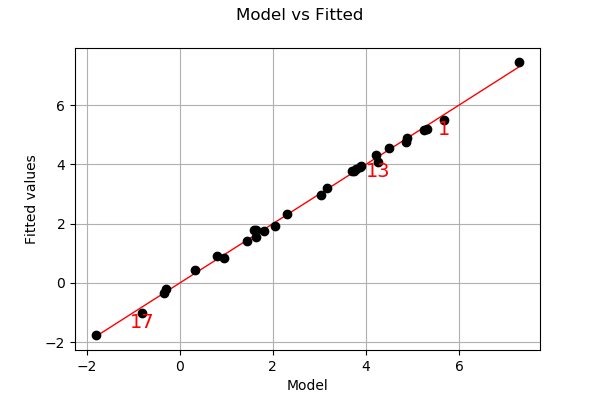

In [8]:
analysis.drawModelVsFitted()

Seems that the linearity hypothesis is accurate.

We complete this analysis using some usefull graphs :

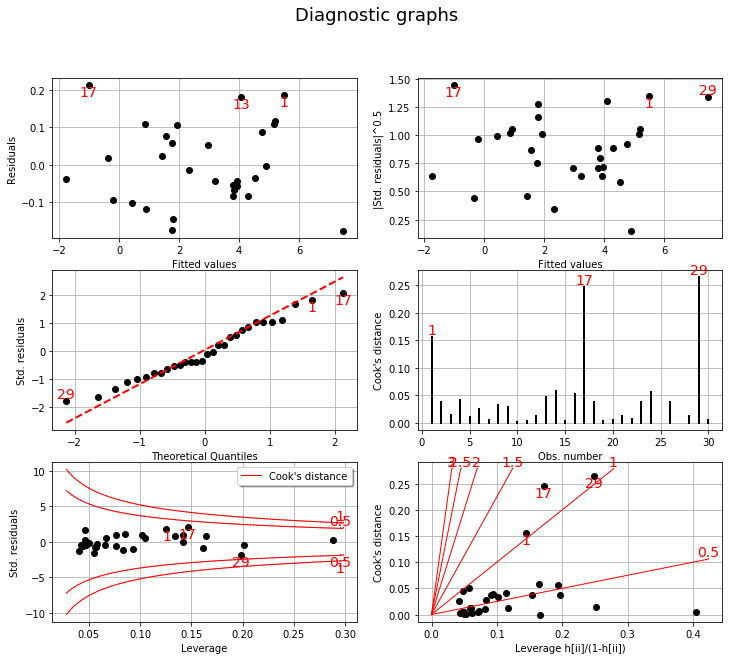

In [9]:
fig = plt.figure(figsize=(12,10))
for k, plot in enumerate(["drawResidualsVsFitted", "drawScaleLocation", "drawQQplot",
             "drawCookDistance", "drawResidualsVsLeverages", "drawCookVsLeverages"]):
    graph = getattr(analysis, plot)()
    ax = fig.add_subplot(3, 2, k + 1)
    v = View(graph, figure=fig, axes=[ax])
_ = v.getFigure().suptitle("Diagnostic graphs", fontsize=18)

These graphics help asserting the linear model hypothesis. Indeed :
 
 - Quantile-to-quantile plot seems accurate
 
 - We notice heteroscedasticity within the noise
 
 - It seems that there is no outlier

Finally we give the intervals for each estimated coefficient (95% confidence interval):

In [10]:
alpha = 0.95
interval = analysis.getCoefficientsConfidenceInterval(alpha)
print("confidence intervals with level=%1.2f : %s" % (alpha, interval))

confidence intervals with level=0.95 : [2.95657, 3.04036]
[1.97751, 2.06406]
[-1.03863, -0.950026]
